# Analysis on Pokemon!

This project is a test projkect on using data from Kaggle Pokemon and doing analysis on it.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import re


In [2]:
### Reading poke data ####

poke_data = pd.read_csv("Pokemon.csv")
poke_data_advanced = pd.read_csv("pokemon2.csv")

#https://www.kaggle.com/datasets/jaidalmotra/pokemon-dataset
#https://www.kaggle.com/datasets/rounakbanik/pokemon
#https://bulbapedia.bulbagarden.net/wiki/Damage#



display(poke_data.head(5))

display(poke_data_advanced.head(5))

print(poke_data_advanced.columns)
print(poke_data_advanced['base_total'])

len(poke_data)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')
0      318
1      405
2      625
3      309
4      405
      ... 
796    570
797    570
798    570
799    600
800    600
Name: base_total, Length: 801, dtype: int64


1072

In [3]:
####merging two poke sets together and formatting ####

poke_data_advanced = poke_data_advanced.rename(columns={'type1' : 'move_type1', 'type2' : 'move_type2'})

poke_df = pd.merge(poke_data, poke_data_advanced[['name', 'abilities', 'move_type1', 'move_type2']], how = 'inner', on = ['name'])

empty_columns = pd.isna(poke_df['abilities'])
filtered_test = poke_df[empty_columns]

print(filtered_test)

poke_df['type1'] = poke_df['type1'].str.lower()
poke_df['type2'] = poke_df['type2'].str.lower()
poke_df['total_defense'] = poke_df['defense'] + poke_df['sp_defense'] + poke_df['speed'] + poke_df['hp']

display(poke_df.head(20))


Empty DataFrame
Columns: [number, name, type1, type2, total, hp, attack, defense, sp_attack, sp_defense, speed, generation, legendary, abilities, move_type1, move_type2]
Index: []


,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,abilities,move_type1,move_type2,total_defense
0,1,Bulbasaur,grass,poison,318,45,49,49,65,65,45,1,False,"['Overgrow', 'Chlorophyll']",grass,poison,204
1,2,Ivysaur,grass,poison,405,60,62,63,80,80,60,1,False,"['Overgrow', 'Chlorophyll']",grass,poison,263
2,3,Venusaur,grass,poison,525,80,82,83,100,100,80,1,False,"['Overgrow', 'Chlorophyll']",grass,poison,343
3,4,Charmander,fire,NaN,309,39,52,43,60,50,65,1,False,"['Blaze', 'Solar Power']",fire,NaN,197
4,5,Charmeleon,fire,NaN,405,58,64,58,80,65,80,1,False,"['Blaze', 'Solar Power']",fire,NaN,261
5,6,Charizard,fire,flying,534,78,84,78,109,85,100,1,False,"['Blaze', 'Solar Power']",fire,flying,341
6,7,Squirtle,water,NaN,314,44,48,65,50,64,43,1,False,"['Torrent', 'Rain Dish']",water,NaN,216
7,8,Wartortle,water,NaN,405,59,63,80,65,80,58,1,False,"['Torrent', 'Rain Dish']",water,NaN,277
8,9,Blastoise,water,NaN,530,79,83,100,85,105,78,1,False,"['Torrent', 'Rain Dish']",water,NaN,362
9,10,Caterpie,bug,NaN,195,45,30,35,20,20,45,1,False,"['Shield Dust', 'Run Away']",bug,NaN,145


Now that we have our data in a dataframe, let's look at how to determine the amount of "Damage" a Pokemon can do. Below is the simple formula that is used. There is a more complicated version of this formula that incorporates more variables, but for this exercise, we will keep to the basics for now.

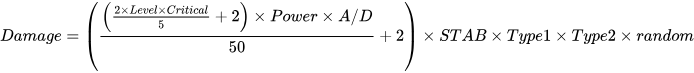



**Damage** = The total amount of damage a pokemon will do when they execute a move.\
**Level** = The level of the pokemon. For this exercise, we will assume the level stays consistent at Lvl 100.\
**Critical** = This number is 2 when it is a critical strike, 1 otherwise. For now, we will assume all moves are non-critical strikes.\
**Power** = is the power of the move. \
**A** = This is the "attack" of a move. Special Attack is also sometimes used, but for this analysis, we will just use basic attack for simplicity.\
**D** = Defense of the target. 
**STAB** = This is 1.5 if the move type matches the pokemon type, 1.0 otherwise.\
**Type 1 & 2** = These determine the effectiveness of the move against a certain type of pokemon. It can range from 0.5 - 2.0. For this analysis, we will assume these are both 1.0 and will not take into account how effective a move is.\
**random** = An integer between 217 to 255 and then divded by 255. We will just assume this also just stays at 1.0 for this analysis. 



With that said, taking into consideration some of our variables being 1.0, this is our new formula that is skinnied-down:

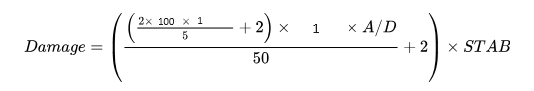

First, let's take moves out of it and just look at the pokemon and their potential damage. For this part, let's assume Power = 1 and then see what the damage of each pokemon will be. Because each pokemon has a move that is related to their Type, we will also assume STAB = 1.5.


Index(['#', 'Name   ', 'Type   ', 'Kind', 'Power', 'Accuracy', 'PP   ',
       'Power_x_Accuracy'],
      dtype='object')
Index(['#', 'Name   ', 'Type   ', 'Kind', 'Power', 'Accuracy', 'PP   ',
       'Power_x_Accuracy', 'Flying', 'Fire', 'Typeless', 'Steel', 'Ghost',
       'Water', 'Ground', 'Dark', 'Normal', 'Grass', 'Poison', 'Dragon', 'Bug',
       'Ice', 'Rock', 'Psychic', 'Fighting', 'Electric'],
      dtype='object')
[[-1.61084036e+00  1.34307241e+00]
 [-5.35365857e-01  7.98893206e-01]
 [-9.96197994e-02 -1.14366883e+00]
 [-4.52499745e-01 -6.96237521e-01]
 [ 7.02710208e-02  6.14412598e-01]
 [-4.18626684e-01  1.32455933e-01]
 [ 7.03841414e-01  4.00332967e-01]
 [ 6.76502711e-01  3.94273347e-01]
 [ 6.78996535e-01  4.05750963e-01]
 [-1.61084036e+00  1.34307241e+00]
 [-9.51526315e-01  1.19772465e+00]
 [ 7.51616964e-02 -1.76667006e+00]
 [ 1.07460772e+00  1.38878025e-02]
 [-1.08248106e+00  1.06862912e+00]
 [-1.52475268e+00  1.43472275e+00]
 [-1.17554004e+00  1.77897751e+00]
 [-1.117051

C:\Users\ardea\AppData\Local\Temp\ipykernel_20100\3658323735.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moves_df_drop_zeros["Accuracy"] = moves_df_drop_zeros['Accuracy'].str.rstrip("%").astype(float) / 100
C:\Users\ardea\AppData\Local\Temp\ipykernel_20100\3658323735.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moves_df_drop_zeros["Power_x_Accuracy"] = moves_df_drop_zeros["Accuracy"]*moves_df_drop_zeros["Power"]


,#,Name,Type,Kind,Power,Accuracy,PP,Power_x_Accuracy,Flying,Fire,...,Poison,Dragon,Bug,Ice,Rock,Psychic,Fighting,Electric,PCA1,PCA2
0,1,Pound,Normal,Physical,40,1.00,2.079879,-0.136497,0,0,...,0,0,0,0,0,0,0,0,-1.610840,1.343072
1,2,Karate Chop,Fighting,Physical,50,1.00,0.945191,0.110552,0,0,...,0,0,0,0,0,0,1,0,-0.535366,0.798893
2,3,DoubleSlap,Normal,Physical,15,0.85,-0.756841,-0.809704,0,0,...,0,0,0,0,0,0,0,0,-0.099620,-1.143669
3,4,Comet Punch,Normal,Physical,18,0.85,-0.189497,-0.746707,0,0,...,0,0,0,0,0,0,0,0,-0.452500,-0.696238
4,5,Mega Punch,Normal,Physical,80,0.85,0.377847,0.555240,0,0,...,0,0,0,0,0,0,0,0,0.070271,0.614413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,350,Rock Blast,Rock,Physical,25,0.90,-0.756841,-0.568832,0,0,...,0,0,0,0,1,0,0,0,0.159217,-0.928857
351,351,Shock Wave,Electric,Special,60,1.01,0.377847,0.372424,0,0,...,0,0,0,0,0,0,0,1,0.030159,0.561426
352,352,Water Pulse,Water,Special,60,1.00,0.377847,0.357601,0,0,...,0,0,0,0,0,0,0,0,0.036549,0.542232
353,353,Doom Desire,Steel,Special,140,1.00,-1.324185,2.333991,0,0,...,0,0,0,0,0,0,0,0,2.602611,0.726970


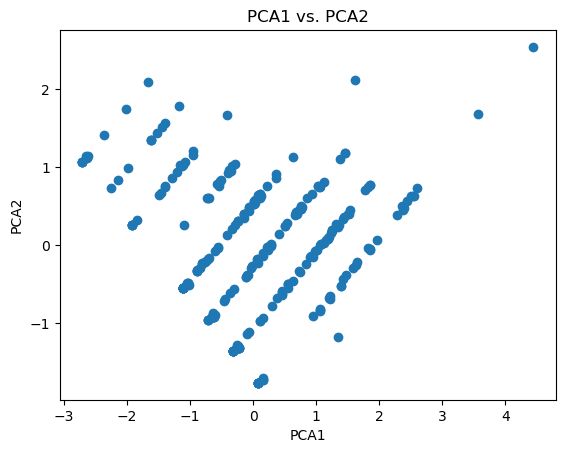

c:\Users\ardea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


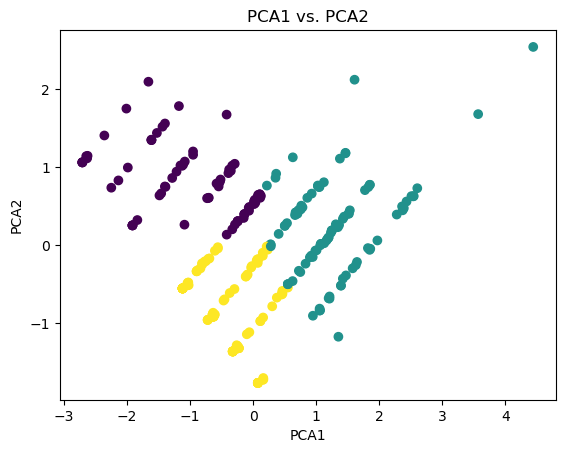

,#,Name,Type,Kind,Power,Accuracy,PP,Power_x_Accuracy,Flying,Fire,...,Dragon,Bug,Ice,Rock,Psychic,Fighting,Electric,PCA1,PCA2,clusters_kmeans
0,1,Pound,Normal,Physical,40,1.00,2.079879,-0.136497,0,0,...,0,0,0,0,0,0,0,-1.610840,1.343072,0
1,2,Karate Chop,Fighting,Physical,50,1.00,0.945191,0.110552,0,0,...,0,0,0,0,0,1,0,-0.535366,0.798893,0
2,3,DoubleSlap,Normal,Physical,15,0.85,-0.756841,-0.809704,0,0,...,0,0,0,0,0,0,0,-0.099620,-1.143669,2
3,4,Comet Punch,Normal,Physical,18,0.85,-0.189497,-0.746707,0,0,...,0,0,0,0,0,0,0,-0.452500,-0.696238,2
4,5,Mega Punch,Normal,Physical,80,0.85,0.377847,0.555240,0,0,...,0,0,0,0,0,0,0,0.070271,0.614413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,350,Rock Blast,Rock,Physical,25,0.90,-0.756841,-0.568832,0,0,...,0,0,0,1,0,0,0,0.159217,-0.928857,2
351,351,Shock Wave,Electric,Special,60,1.01,0.377847,0.372424,0,0,...,0,0,0,0,0,0,1,0.030159,0.561426,0
352,352,Water Pulse,Water,Special,60,1.00,0.377847,0.357601,0,0,...,0,0,0,0,0,0,0,0.036549,0.542232,0
353,353,Doom Desire,Steel,Special,140,1.00,-1.324185,2.333991,0,0,...,0,0,0,0,0,0,0,2.602611,0.726970,1


297


In [4]:
#### LOOKING AT POWER MOVES #####

moves_df = pd.read_csv("Pokemon_Moves_Better.csv", header = 0)
moves_df_no_desc = moves_df.drop(columns= ['Effect'])
moves_df_drop_zeros = moves_df_no_desc.dropna(subset=['Accuracy'])


moves_df_drop_zeros["Accuracy"] = moves_df_drop_zeros['Accuracy'].str.rstrip("%").astype(float) / 100 
moves_df_drop_zeros["Power_x_Accuracy"] = moves_df_drop_zeros["Accuracy"]*moves_df_drop_zeros["Power"]

df_moves = pd.DataFrame(moves_df_drop_zeros)
df_moves_copy = df_moves.copy(deep = True)



print(df_moves_copy.columns)
move_set_types = set(df_moves_copy['Type   '])

for a_type in move_set_types:

    df_moves_copy[a_type] = (df_moves_copy['Type   '] == a_type).astype(int)


mean_moves = moves_df_drop_zeros["Power_x_Accuracy"].mean()

standardize = StandardScaler()

standard_moves = standardize.fit_transform(df_moves_copy[['Power_x_Accuracy', 'PP   ']])

df_moves_copy[['Power_x_Accuracy', 'PP   ']] = standard_moves

print(df_moves_copy.columns)

pca = PCA(n_components = 2)
pca_moves = pca.fit_transform(df_moves_copy[['Power_x_Accuracy', 'PP   ', 'Ground', 'Typeless', 'Dark', 'Water', 'Psychic','Flying', 'Ghost', 'Dragon', 'Rock', 'Steel', 'Fire', 'Ice', 'Normal','Poison', 'Bug', 'Electric', 'Fighting', 'Grass']])

print(pca_moves)

df_moves_copy[['PCA1','PCA2']] = pca_moves[:,:2]

display(df_moves_copy)

plt.scatter(x = df_moves_copy['PCA1'], y = df_moves_copy['PCA2'])
plt.title("PCA1 vs. PCA2")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=19).fit(df_moves_copy[['PCA1', 'PCA2']])
clusters_moves = kmeans.labels_

df_moves_copy['clusters_kmeans'] = clusters_moves



plt.scatter(x = df_moves_copy['PCA1'], y = df_moves_copy['PCA2'], c = df_moves_copy['clusters_kmeans'], cmap = 'viridis')
plt.title("PCA1 vs. PCA2")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

plt.show()

display(df_moves_copy)
print(len(moves_df_drop_zeros))

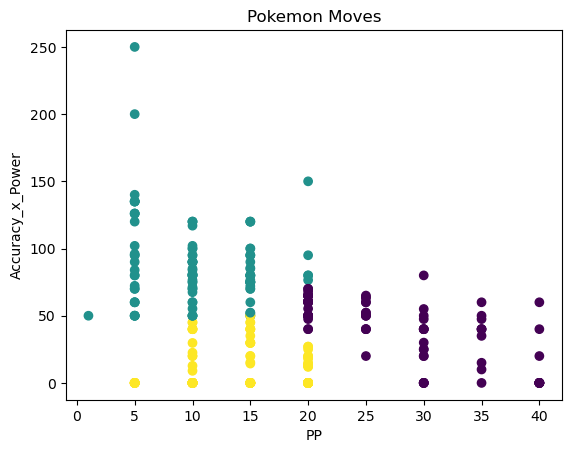

In [5]:
plt.scatter(x = df_moves['PP   '], y = df_moves['Power_x_Accuracy'], c = df_moves_copy['clusters_kmeans'], cmap = 'viridis')
plt.title("Pokemon Moves")
plt.xlabel("PP")
plt.ylabel("Accuracy_x_Power")

plt.show()
plt.show()


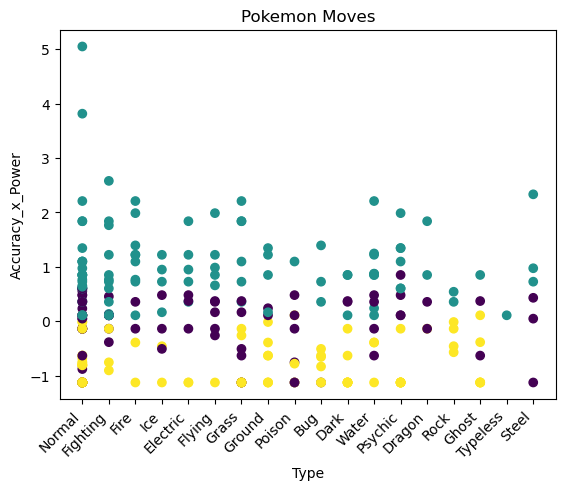

In [6]:

plt.scatter(x = df_moves_copy['Type   '], y = df_moves_copy['Power_x_Accuracy'], c = df_moves_copy['clusters_kmeans'], cmap = 'viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Pokemon Moves")
plt.xlabel("Type")
plt.ylabel("Accuracy_x_Power")

plt.show()





In [7]:

df_moves_copy_Atier = df_moves_copy[df_moves_copy['clusters_kmeans'] == 1]

total_move_types = len(df_moves_copy_Atier)

type_counter = df_moves_copy_Atier['Type   '].value_counts()

type_counter_moves_dict = type_counter.to_dict()


print(total_move_types)
print(type_counter_moves_dict)

102
{'Normal': 26, 'Fighting': 12, 'Fire': 9, 'Water': 9, 'Grass': 6, 'Psychic': 6, 'Flying': 5, 'Electric': 5, 'Ground': 4, 'Ice': 4, 'Bug': 3, 'Dark': 3, 'Steel': 3, 'Rock': 2, 'Dragon': 2, 'Typeless': 1, 'Poison': 1, 'Ghost': 1}


c:\Users\ardea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


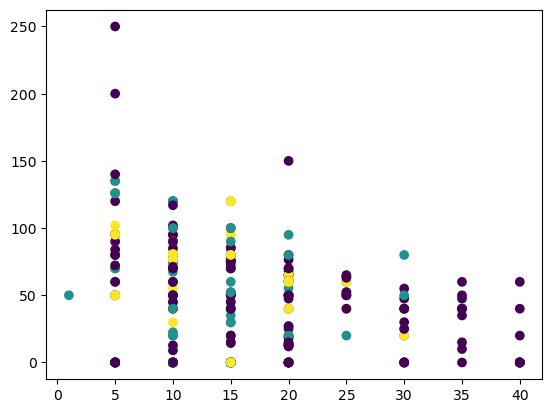

,#,Name,Type,Kind,Power,Accuracy,PP,Power_x_Accuracy,Flying,Fire,...,Bug,Ice,Rock,Psychic,Fighting,Electric,PCA1,PCA2,clusters_kmeans,gmm
0,1,Pound,Normal,Physical,40,1.00,2.079879,-0.136497,0,0,...,0,0,0,0,0,0,-1.610840,1.343072,0,0
1,2,Karate Chop,Fighting,Physical,50,1.00,0.945191,0.110552,0,0,...,0,0,0,0,1,0,-0.535366,0.798893,0,0
2,3,DoubleSlap,Normal,Physical,15,0.85,-0.756841,-0.809704,0,0,...,0,0,0,0,0,0,-0.099620,-1.143669,2,0
3,4,Comet Punch,Normal,Physical,18,0.85,-0.189497,-0.746707,0,0,...,0,0,0,0,0,0,-0.452500,-0.696238,2,0
4,5,Mega Punch,Normal,Physical,80,0.85,0.377847,0.555240,0,0,...,0,0,0,0,0,0,0.070271,0.614413,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,350,Rock Blast,Rock,Physical,25,0.90,-0.756841,-0.568832,0,0,...,0,0,1,0,0,0,0.159217,-0.928857,2,1
351,351,Shock Wave,Electric,Special,60,1.01,0.377847,0.372424,0,0,...,0,0,0,0,0,1,0.030159,0.561426,0,2
352,352,Water Pulse,Water,Special,60,1.00,0.377847,0.357601,0,0,...,0,0,0,0,0,0,0.036549,0.542232,0,2
353,353,Doom Desire,Steel,Special,140,1.00,-1.324185,2.333991,0,0,...,0,0,0,0,0,0,2.602611,0.726970,1,0


In [8]:
gmm_moves = GaussianMixture(n_components=3, random_state=19).fit(df_moves_copy[['Power_x_Accuracy', 'PP   ', 'Ground', 'Typeless', 'Dark', 'Water', 'Psychic','Flying', 'Ghost', 'Dragon', 'Rock', 'Steel', 'Fire', 'Ice', 'Normal','Poison', 'Bug', 'Electric', 'Fighting', 'Grass']])
gmm_labels = gmm_moves.predict(df_moves_copy[['Power_x_Accuracy', 'PP   ', 'Ground', 'Typeless', 'Dark', 'Water', 'Psychic','Flying', 'Ghost', 'Dragon', 'Rock', 'Steel', 'Fire', 'Ice', 'Normal','Poison', 'Bug', 'Electric', 'Fighting', 'Grass']])

df_moves_copy['gmm'] = gmm_labels

plt.scatter(x = df_moves['PP   '], y = df_moves['Power_x_Accuracy'], c = df_moves_copy['gmm'], cmap = 'viridis')


plt.show()

display(df_moves_copy)

In [9]:
##### adding in some columns with STAB And damage_output and changing to legendary to binary####

poke_df['STAB'] = 1.5

mean_defense = poke_df['defense'].mean()
mean_spdefense = poke_df['sp_defense'].mean()

poke_df['damage_output'] = ((42 * mean_moves * (poke_df['attack'] + poke_df['sp_attack']) / (0.5*mean_defense + mean_spdefense*.5)/50 + 2)) * poke_df['STAB']

poke_df['legendary'] = poke_df['legendary'].astype(int)

weakness_dict = {}

weakness_dict['psychic'] = 'bug'
weakness_dict['water'] = 'electric'
weakness_dict['ice'] = 'fire'
weakness_dict['fighting'] = 'flying'
weakness_dict['ground'] = 'water'
weakness_dict['rock'] = 'grass'
weakness_dict['ghost'] = 'ghost'
weakness_dict['poison'] = 'ground'
weakness_dict['dragon'] = 'fairy'
weakness_dict['normal'] = 'fighting'
weakness_dict['grass'] = 'fire'
weakness_dict['electric'] = 'ground'
weakness_dict['fire'] = 'water'
weakness_dict['dark'] = 'fighting'
weakness_dict['steel'] = 'fire'
weakness_dict['flying'] = 'electric'
weakness_dict['fairy'] = 'steel'
weakness_dict['bug'] = 'fire'

poke_df['weakness'] = poke_df['type1'].map(weakness_dict)

display(poke_df.head(50))



##### Calculating Moves and Power of Moves ####




,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,abilities,move_type1,move_type2,total_defense,STAB,damage_output,weakness
0,1,Bulbasaur,grass,poison,318,45,49,49,65,65,45,1,0,"['Overgrow', 'Chlorophyll']",grass,poison,204,1.5,96.122415,fire
1,2,Ivysaur,grass,poison,405,60,62,63,80,80,60,1,0,"['Overgrow', 'Chlorophyll']",grass,poison,263,1.5,118.994587,fire
2,3,Venusaur,grass,poison,525,80,82,83,100,100,80,1,0,"['Overgrow', 'Chlorophyll']",grass,poison,343,1.5,151.669118,fire
3,4,Charmander,fire,NaN,309,39,52,43,60,50,65,1,0,"['Blaze', 'Solar Power']",fire,NaN,197,1.5,94.488688,water
4,5,Charmeleon,fire,NaN,405,58,64,58,80,65,80,1,0,"['Blaze', 'Solar Power']",fire,NaN,261,1.5,120.628313,water
5,6,Charizard,fire,flying,534,78,84,78,109,85,100,1,0,"['Blaze', 'Solar Power']",fire,flying,341,1.5,160.654614,water
6,7,Squirtle,water,NaN,314,44,48,65,50,64,43,1,0,"['Torrent', 'Rain Dish']",water,NaN,216,1.5,83.052602,electric
7,8,Wartortle,water,NaN,405,59,63,80,65,80,58,1,0,"['Torrent', 'Rain Dish']",water,NaN,277,1.5,107.558501,electric
8,9,Blastoise,water,NaN,530,79,83,100,85,105,78,1,0,"['Torrent', 'Rain Dish']",water,NaN,362,1.5,140.233032,electric
9,10,Caterpie,bug,NaN,195,45,30,35,20,20,45,1,0,"['Shield Dust', 'Run Away']",bug,NaN,145,1.5,43.843164,fire


In [10]:
####standardizing features and making categorical columns for kmeans later ####

set_types = set(poke_df['type1'])

poke_df_copy = poke_df.copy(deep = True)

for a_type in set_types:

    poke_df_copy[a_type] = (poke_df['type1'] == a_type).astype(int)


feature_vars = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed','damage_output', 'legendary','ground', 'psychic', 'steel', 'fairy', 'grass', 'dark', 'normal','poison', 'fighting', 'water', 'flying', 'electric', 'ghost', 'rock', 'ice', 'dragon', 'bug', 'fire']

feature_vars_to_standardize = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'damage_output']

standardize = StandardScaler()

standard_vars = standardize.fit_transform(poke_df_copy[feature_vars_to_standardize])

poke_df_copy[feature_vars_to_standardize] = standard_vars

display(poke_df_copy.head(25))



,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,...,steel,fire,grass,fairy,dark,psychic,electric,fighting,bug,ice
0,1,Bulbasaur,grass,poison,318,-0.893329,-0.904505,-0.753104,-0.125093,-0.159897,...,0,0,1,0,0,0,0,0,0,0
1,2,Ivysaur,grass,poison,405,-0.317083,-0.458607,-0.276716,0.395756,0.396392,...,0,0,1,0,0,0,0,0,0,0
2,3,Venusaur,grass,poison,525,0.451245,0.227391,0.403840,1.090221,1.138111,...,0,0,1,0,0,0,0,0,0,0
3,4,Charmander,fire,NaN,309,-1.123828,-0.801606,-0.957271,-0.298709,-0.716187,...,0,1,0,0,0,0,0,0,0,0
4,5,Charmeleon,fire,NaN,405,-0.393916,-0.390007,-0.446854,0.395756,-0.159897,...,0,1,0,0,0,0,0,0,0,0
5,6,Charizard,fire,flying,534,0.374412,0.295990,0.233701,1.402730,0.581821,...,0,1,0,0,0,0,0,0,0,0
6,7,Squirtle,water,NaN,314,-0.931746,-0.938805,-0.208660,-0.645942,-0.196983,...,0,0,0,0,0,0,0,0,0,0
7,8,Wartortle,water,NaN,405,-0.355499,-0.424307,0.301757,-0.125093,0.396392,...,0,0,0,0,0,0,0,0,0,0
8,9,Blastoise,water,NaN,530,0.412829,0.261690,0.982312,0.569372,1.323540,...,0,0,0,0,0,0,0,0,0,0
9,10,Caterpie,bug,NaN,195,-0.893329,-1.556203,-1.229493,-1.687639,-1.828765,...,0,0,0,0,0,0,0,0,1,0


In [11]:
##### putting power of moves into dataframe #####


#moves_dict = dict(zip(moves_df_drop_zeros['Name   '], moves_df_drop_zeros['Power']))

#print(moves_dict)

#filtered_pound = poke_df_copy[poke_df_copy['move1'] == 'Keen Eye']

#set_moves_fromdf = set(poke_df_copy['move1'])
#print(set_moves_fromdf)

#poke_df_copy['move1'] = poke_df_copy['abilities'].apply(lambda x: re.findall(r"'([^']+)'", x)[0] if isinstance(x, str) else 0)
#poke_df_copy['move1_power'] = poke_df_copy['abilities'].apply(lambda x: moves_dict.get(x))

#display(poke_df_copy)
#print(moves_dict['Ice'])

                     hp    attack   defense  sp_attack  sp_defense     speed  \
hp             1.000000  0.438234  0.229093   0.378576    0.356633  0.155916   
attack         0.438234  1.000000  0.448673   0.314118    0.196783  0.318001   
defense        0.229093  0.448673  1.000000   0.211695    0.499616 -0.022666   
sp_attack      0.378576  0.314118  0.211695   1.000000    0.482762  0.418947   
sp_defense     0.356633  0.196783  0.499616   0.482762    1.000000  0.203668   
speed          0.155916  0.318001 -0.022666   0.418947    0.203668  1.000000   
damage_output  0.504056  0.813179  0.408229   0.807989    0.418080  0.454187   

               damage_output  
hp                  0.504056  
attack              0.813179  
defense             0.408229  
sp_attack           0.807989  
sp_defense          0.418080  
speed               0.454187  
damage_output       1.000000  


<Axes: >

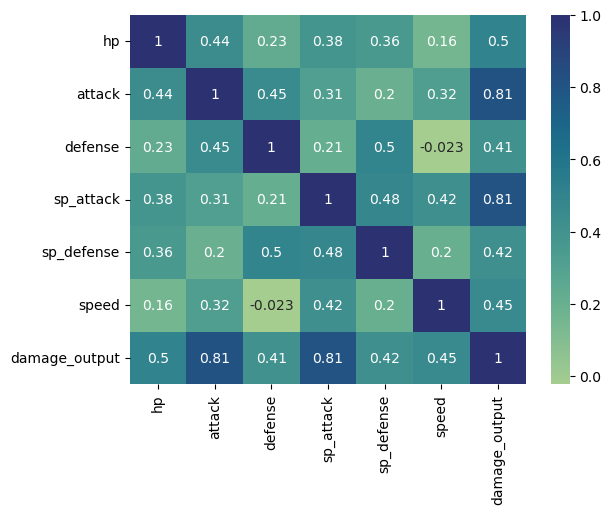

In [12]:
####correlation######
correlation_matrix = poke_df_copy[feature_vars_to_standardize].corr()

print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap = 'crest')

In [13]:
#### Other EDA  - describe ####

poke_df_copy.describe()
poke_df.describe()



,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,total_defense,STAB,damage_output
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.0,780.000000
mean,395.091026,417.551282,68.253846,75.370513,71.132051,68.602564,69.311538,64.912821,3.647436,0.067949,273.610256,1.5,120.606321
std,230.529921,109.230797,26.047250,29.173333,29.406613,28.817624,26.981696,27.144033,1.926121,0.251819,71.663809,0.0,38.398658
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,116.000000,1.5,19.337266
25%,195.750000,320.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.000000,210.000000,1.5,92.854961
50%,392.500000,421.500000,65.000000,75.000000,66.000000,65.000000,65.000000,63.000000,4.000000,0.000000,280.000000,1.5,120.628313
75%,591.250000,499.250000,80.000000,95.000000,87.250000,90.000000,85.000000,85.000000,5.000000,0.000000,325.250000,1.5,147.584802
max,801.000000,720.000000,255.000000,181.000000,230.000000,173.000000,230.000000,160.000000,7.000000,1.000000,500.000000,1.5,248.058986


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'grass'),
  Text(1, 0, 'fire'),
  Text(2, 0, 'water'),
  Text(3, 0, 'bug'),
  Text(4, 0, 'normal'),
  Text(5, 0, 'poison'),
  Text(6, 0, 'electric'),
  Text(7, 0, 'ground'),
  Text(8, 0, 'fairy'),
  Text(9, 0, 'fighting'),
  Text(10, 0, 'psychic'),
  Text(11, 0, 'rock'),
  Text(12, 0, 'ghost'),
  Text(13, 0, 'ice'),
  Text(14, 0, 'dragon'),
  Text(15, 0, 'dark'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'flying')])

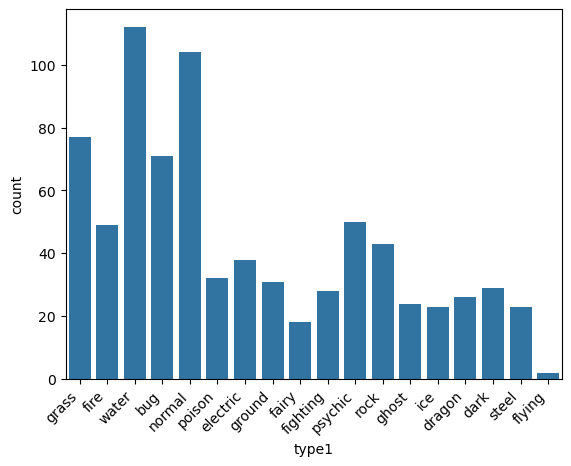

In [14]:
#### Other EDA  - count of types ####

sns.countplot(x='type1', data = poke_df_copy)
plt.xticks(rotation=45, ha='right')

[[-0.89332912 -0.90450527 -0.75310448 ...  0.          0.
   0.        ]
 [-0.31708308 -0.45860691 -0.27671562 ...  0.          0.
   0.        ]
 [ 0.45124498  0.22739058  0.4038399  ...  0.          0.
   0.        ]
 ...
 [ 5.94479057  0.87908819 -0.61699337 ...  0.          0.
   0.        ]
 [ 1.10432382  1.08488743  1.01633986 ...  0.          0.
   0.        ]
 [ 0.45124498  0.67328894  1.49272872 ...  0.          0.
   0.        ]]
[[-1.532599   -0.04630149]
 [-0.15151067 -0.05510365]
 [ 1.76957542 -0.04351158]
 ...
 [ 2.77938614 -0.018759  ]
 [ 3.40437647 -0.08723218]
 [ 3.29047446  0.84161453]]


,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,...,grass,fairy,dark,psychic,electric,fighting,bug,ice,PCA1,PCA2
0,1,Bulbasaur,grass,poison,318,-0.893329,-0.904505,-0.753104,-0.125093,-0.159897,...,1,0,0,0,0,0,0,0,-1.532599,-0.046301
1,2,Ivysaur,grass,poison,405,-0.317083,-0.458607,-0.276716,0.395756,0.396392,...,1,0,0,0,0,0,0,0,-0.151511,-0.055104
2,3,Venusaur,grass,poison,525,0.451245,0.227391,0.403840,1.090221,1.138111,...,1,0,0,0,0,0,0,0,1.769575,-0.043512
3,4,Charmander,fire,NaN,309,-1.123828,-0.801606,-0.957271,-0.298709,-0.716187,...,0,0,0,0,0,0,0,0,-1.703013,-0.817818
4,5,Charmeleon,fire,NaN,405,-0.393916,-0.390007,-0.446854,0.395756,-0.159897,...,0,0,0,0,0,0,0,0,-0.157155,-0.848147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,797,Celesteela,steel,flying,570,1.104324,0.879088,1.084395,1.333284,1.175196,...,0,0,0,0,0,0,0,0,2.678080,0.797308
776,798,Kartana,grass,steel,570,-0.355499,3.623078,2.037173,-0.333432,-1.420820,...,1,0,0,0,0,0,0,0,2.810732,-0.299776
777,799,Guzzlord,dark,dragon,570,5.944791,0.879088,-0.616993,0.986051,-0.604929,...,0,0,1,0,0,0,0,0,2.779386,-0.018759
778,800,Necrozma,psychic,NaN,600,1.104324,1.084887,1.016340,2.027749,0.730165,...,0,0,0,1,0,0,0,0,3.404376,-0.087232


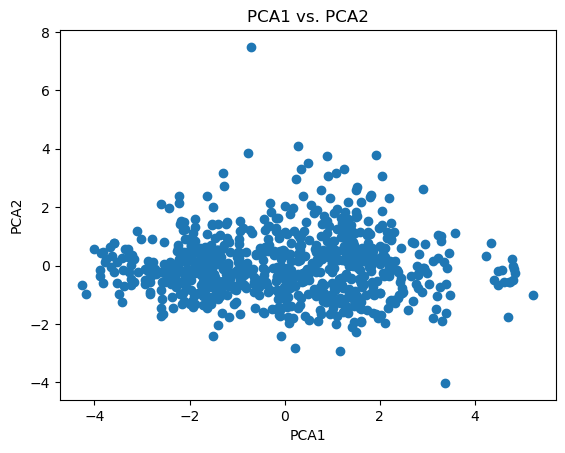

In [15]:
####creating PCA####


np_poke = poke_df_copy[feature_vars].to_numpy()

print(np_poke)

pca = PCA(n_components = 2)
pca_poke = pca.fit_transform(np_poke)

print(pca_poke)

poke_df_copy[['PCA1','PCA2']] = pca_poke[:,:2]

display(poke_df_copy)

plt.scatter(x = poke_df_copy['PCA1'], y = poke_df_copy['PCA2'])
plt.title("PCA1 vs. PCA2")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

We see that basically every pokemon has a skill that matches their type. So let's assume our STAB = 1.5 for our pokemon.

Now let's go ahead and see the top 25 damage pokemon. 

C:\Users\ardea\AppData\Local\Temp\ipykernel_20100\154603963.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x = filtered_poke['PCA1'], y = filtered_poke['PCA2'], c = filtered_poke['color'], cmap = 'viridis' )


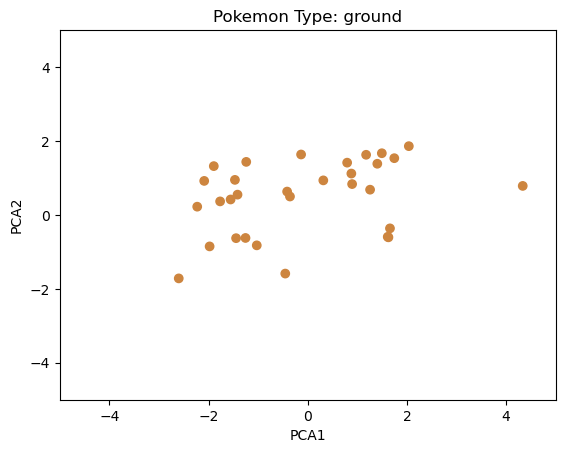

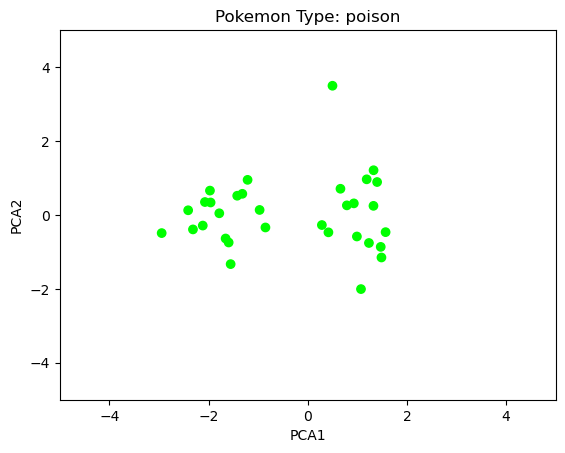

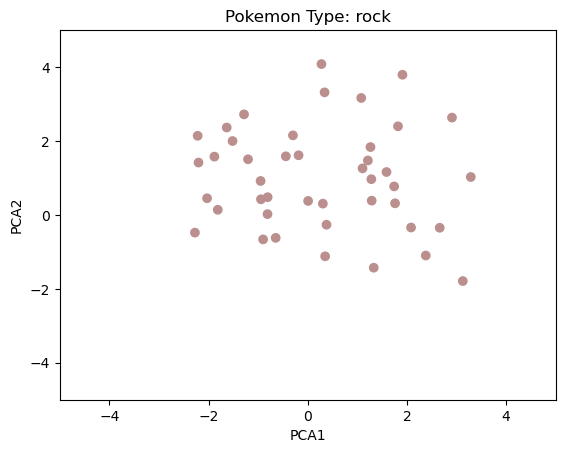

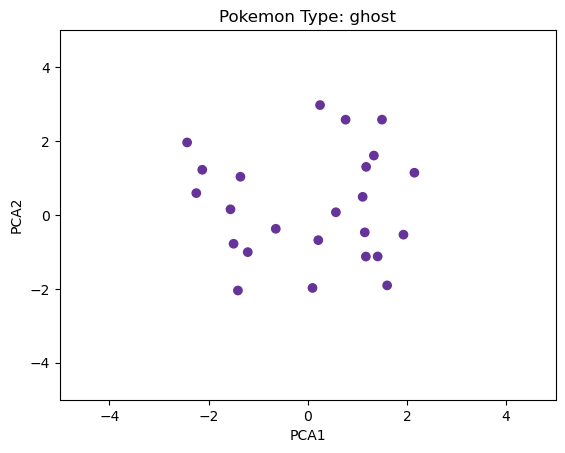

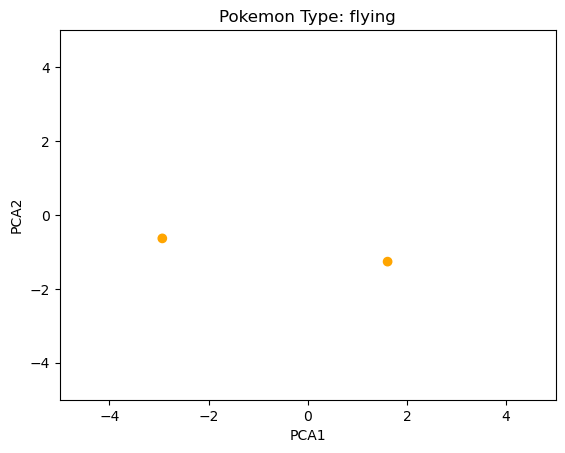

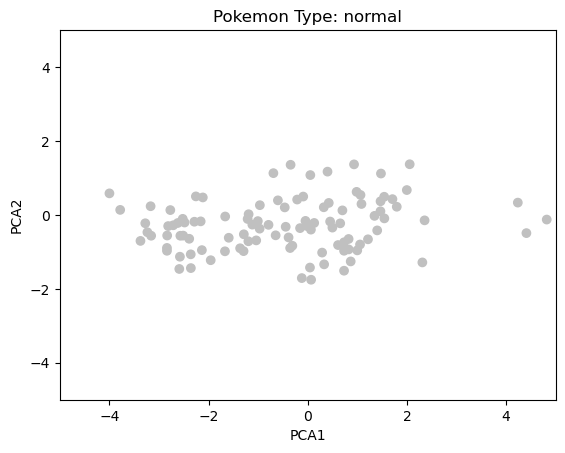

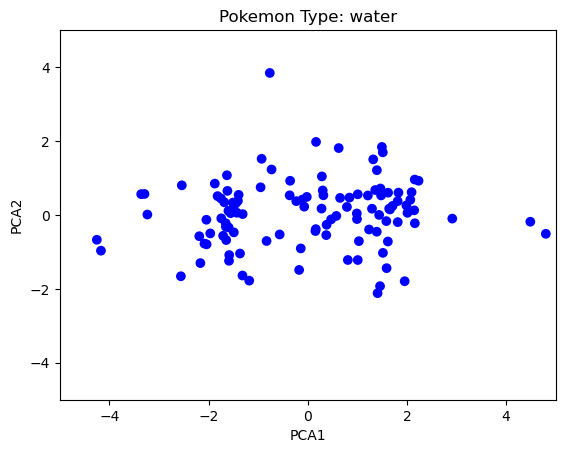

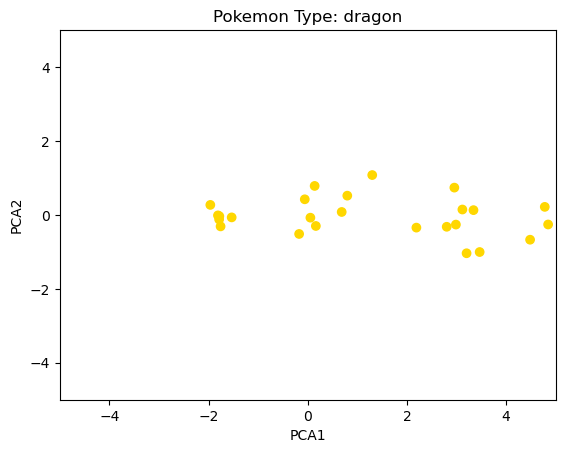

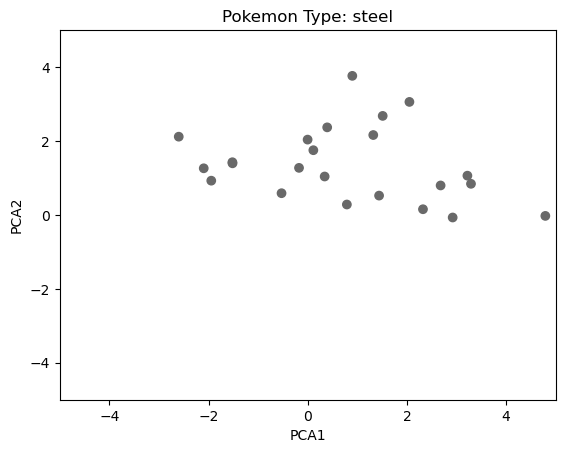

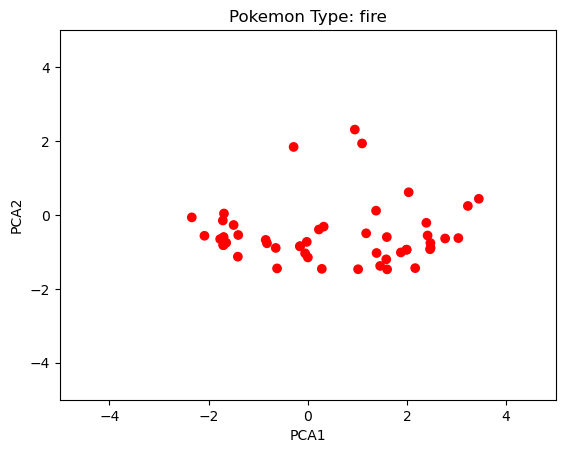

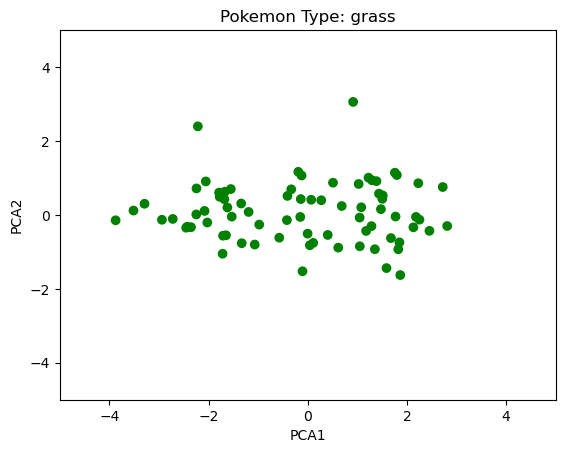

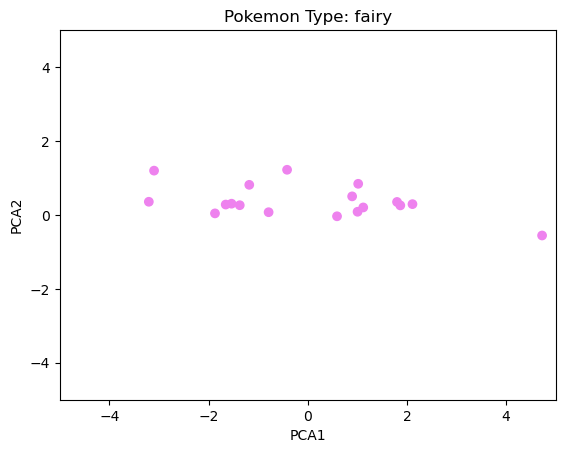

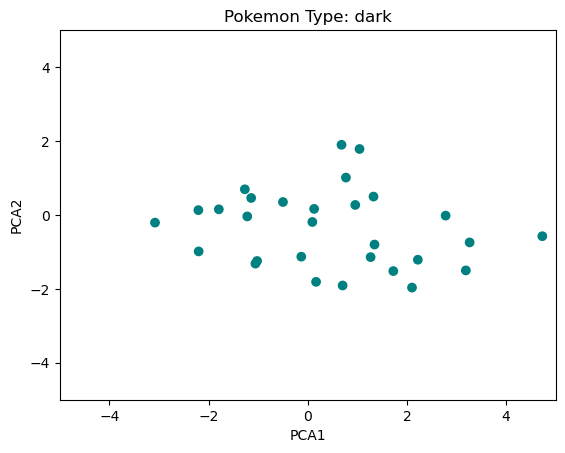

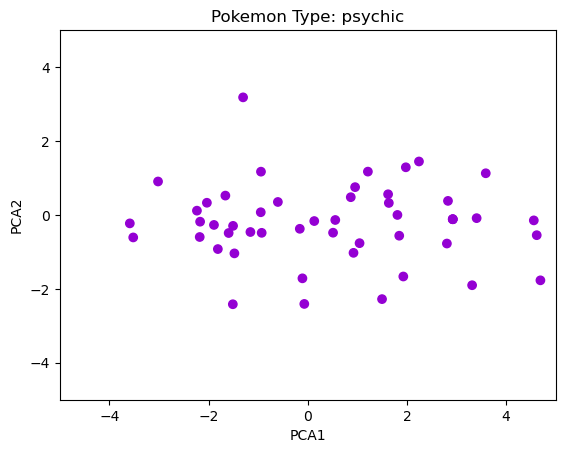

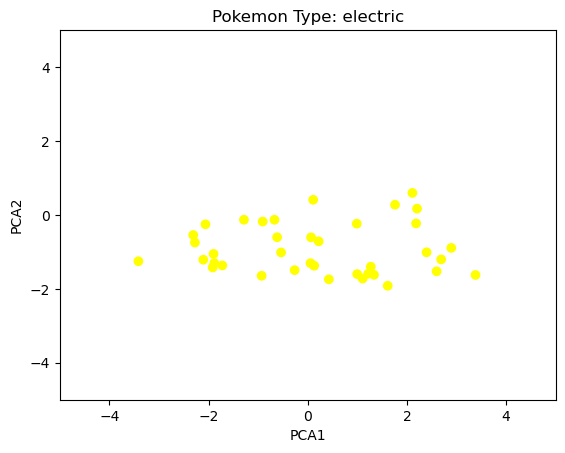

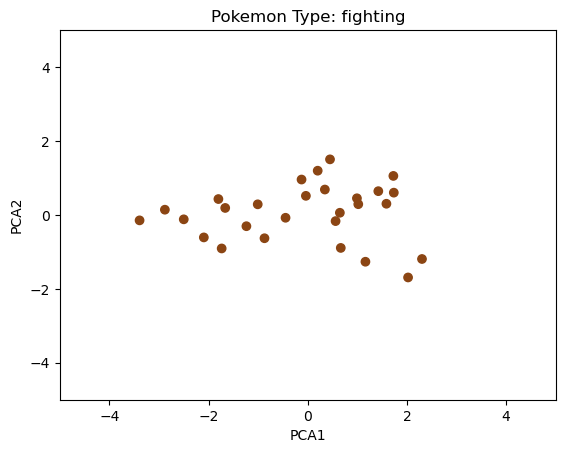

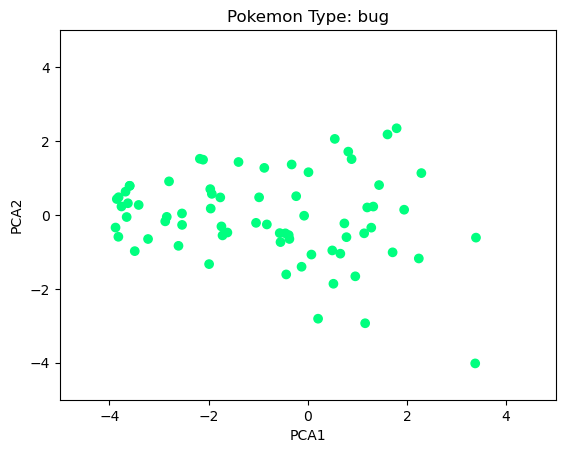

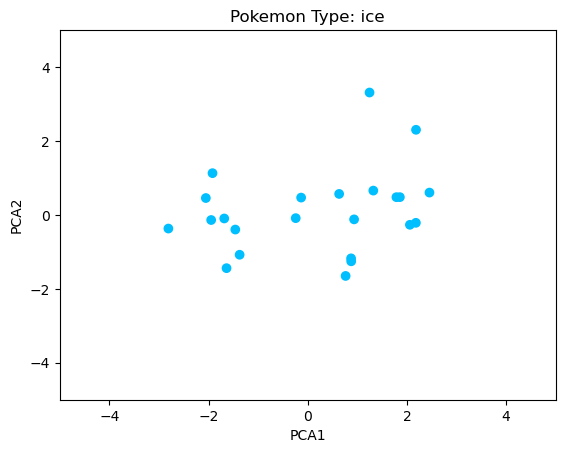

C:\Users\ardea\AppData\Local\Temp\ipykernel_20100\154603963.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x = poke_df_copy['PCA1'], y = poke_df_copy['PCA2'], c = poke_df_copy['color'], cmap = 'viridis', s=20)


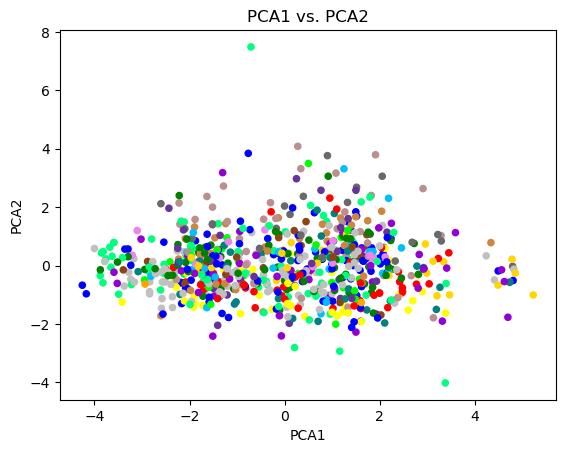

In [16]:
#### looking at PCA per subytpe ####

type_dict = {}




type_dict['psychic'] = 'darkviolet'
type_dict['water'] = 'blue'
type_dict['ice'] = 'deepskyblue'
type_dict['fighting'] = 'saddlebrown'
type_dict['ground'] = 'peru'
type_dict['rock'] = 'rosybrown'
type_dict['ghost'] = 'rebeccapurple'
type_dict['poison'] = 'lime'
type_dict['dragon'] = 'gold'
type_dict['normal'] = 'silver'
type_dict['grass'] = 'green'
type_dict['electric'] = 'yellow'
type_dict['fire'] = 'red'
type_dict['dark'] = 'teal'
type_dict['steel'] = 'dimgrey'
type_dict['flying'] = 'orange'
type_dict['fairy'] = 'violet'
type_dict['bug'] = 'springgreen'


poke_df_copy['color'] = poke_df_copy['type1'].map(type_dict)

for a_type in set_types:

    filtered_poke = poke_df_copy[poke_df_copy['type1'] == a_type]
 

    plt.scatter(x = filtered_poke['PCA1'], y = filtered_poke['PCA2'], c = filtered_poke['color'], cmap = 'viridis' )
    plt.title(f"Pokemon Type: {a_type}")
    
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.show()


plt.scatter(x = poke_df_copy['PCA1'], y = poke_df_copy['PCA2'], c = poke_df_copy['color'], cmap = 'viridis', s=20)
plt.title("PCA1 vs. PCA2")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

https://github.com/PokeAPI/pokeapi/blob/master/data/v2/csv/moves.csv


C:\Users\ardea\AppData\Local\Temp\ipykernel_20100\2996925698.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x = poke_df['total'], y = poke_df['damage_output'], c = poke_df_copy['color'], cmap = 'viridis')


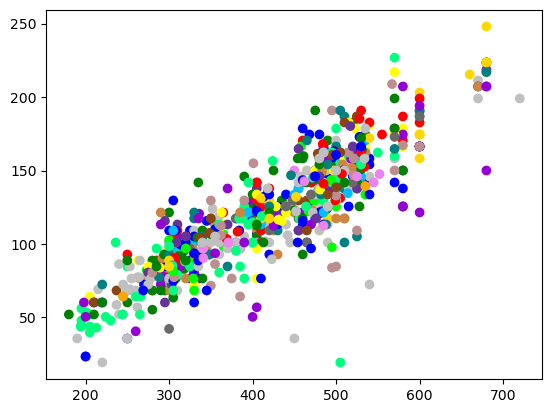

In [17]:
plt.scatter(x = poke_df['total'], y = poke_df['damage_output'], c = poke_df_copy['color'], cmap = 'viridis')


C:\Users\ardea\AppData\Local\Temp\ipykernel_20100\240928178.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x = poke_df['total_defense'], y = poke_df['damage_output'], c = poke_df_copy['color'], cmap = 'viridis')


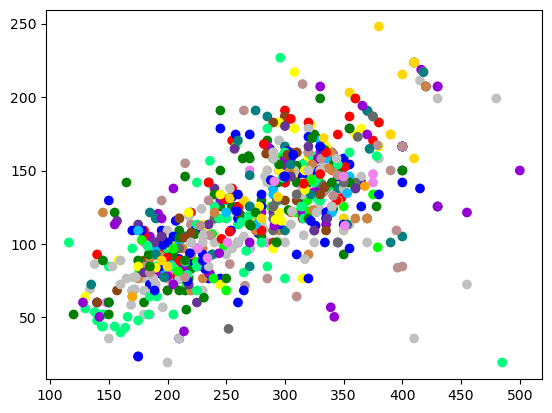

In [18]:
plt.scatter(x = poke_df['total_defense'], y = poke_df['damage_output'], c = poke_df_copy['color'], cmap = 'viridis')

c:\Users\ardea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,...,psychic,electric,fighting,bug,ice,PCA1,PCA2,color,clusters_kmeans,gmm
0,1,Bulbasaur,grass,poison,318,-0.893329,-0.904505,-0.753104,-0.125093,-0.159897,...,0,0,0,0,0,-1.532599,-0.046301,green,2,2
1,2,Ivysaur,grass,poison,405,-0.317083,-0.458607,-0.276716,0.395756,0.396392,...,0,0,0,0,0,-0.151511,-0.055104,green,0,2
2,3,Venusaur,grass,poison,525,0.451245,0.227391,0.403840,1.090221,1.138111,...,0,0,0,0,0,1.769575,-0.043512,green,1,2
3,4,Charmander,fire,NaN,309,-1.123828,-0.801606,-0.957271,-0.298709,-0.716187,...,0,0,0,0,0,-1.703013,-0.817818,red,2,0
4,5,Charmeleon,fire,NaN,405,-0.393916,-0.390007,-0.446854,0.395756,-0.159897,...,0,0,0,0,0,-0.157155,-0.848147,red,0,0
5,6,Charizard,fire,flying,534,0.374412,0.295990,0.233701,1.402730,0.581821,...,0,0,0,0,0,1.992336,-0.940775,red,0,0
6,7,Squirtle,water,NaN,314,-0.931746,-0.938805,-0.208660,-0.645942,-0.196983,...,0,0,0,0,0,-1.818475,0.508691,blue,2,2
7,8,Wartortle,water,NaN,405,-0.355499,-0.424307,0.301757,-0.125093,0.396392,...,0,0,0,0,0,-0.365012,0.529552,blue,0,2
8,9,Blastoise,water,NaN,530,0.412829,0.261690,0.982312,0.569372,1.323540,...,0,0,0,0,0,1.619319,0.601977,blue,1,2
9,10,Caterpie,bug,NaN,195,-0.893329,-1.556203,-1.229493,-1.687639,-1.828765,...,0,0,0,1,0,-3.875809,-0.341611,springgreen,2,2


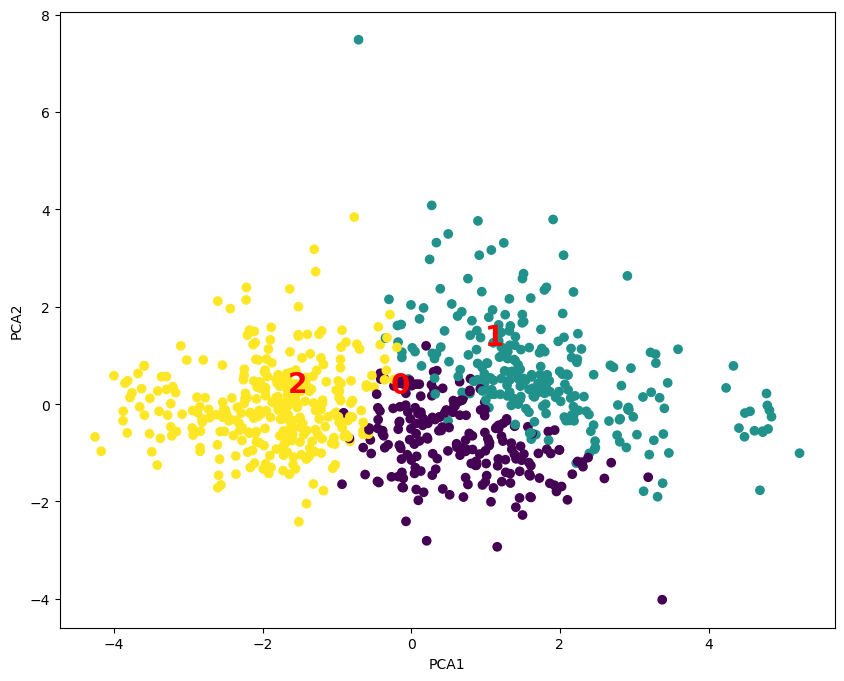

In [46]:
#### kmeans #####  
       
kmeans = KMeans(n_clusters=3, random_state=19).fit(poke_df_copy[feature_vars])
clusters = kmeans.labels_

poke_df_copy['clusters_kmeans'] = clusters

display(poke_df_copy.head(40))


plt.figure(figsize=(10, 8))

plt.scatter(x = poke_df_copy['PCA1'], y = poke_df_copy['PCA2'], c = poke_df_copy['clusters_kmeans'], cmap = 'viridis')

####cluster 2 ####
plt.annotate(poke_df_copy['clusters_kmeans'][0], (poke_df_copy['PCA1'][0], poke_df_copy['PCA2'][0]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=20, color='red', fontweight = 'bold')

####cluste 0 #####
plt.annotate(poke_df_copy['clusters_kmeans'][1], (poke_df_copy['PCA1'][1], poke_df_copy['PCA2'][1]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=20, color='red', fontweight = 'bold')

#### cluster 1 ####
plt.annotate(poke_df_copy['clusters_kmeans'][35], (poke_df_copy['PCA1'][35], poke_df_copy['PCA2'][27]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=20, color='red', fontweight = 'bold')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

c:\Users\ardea\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


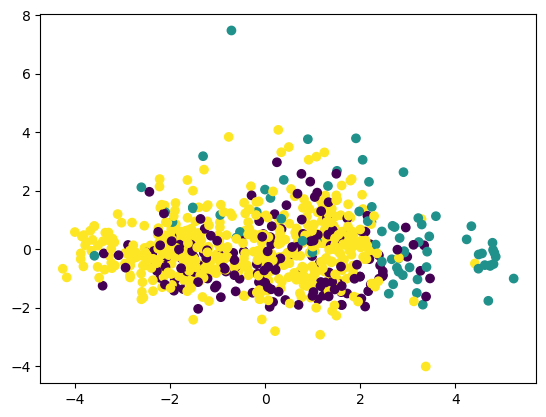

In [20]:
gmm_type = GaussianMixture(n_components=3, random_state=19).fit(poke_df_copy[feature_vars])
gmm_labels_type = gmm_type.predict(poke_df_copy[feature_vars])

poke_df_copy['gmm'] = gmm_labels_type

plt.scatter(x = poke_df_copy['PCA1'], y = poke_df_copy['PCA2'], c = poke_df_copy['gmm'], cmap = 'viridis')


plt.show()


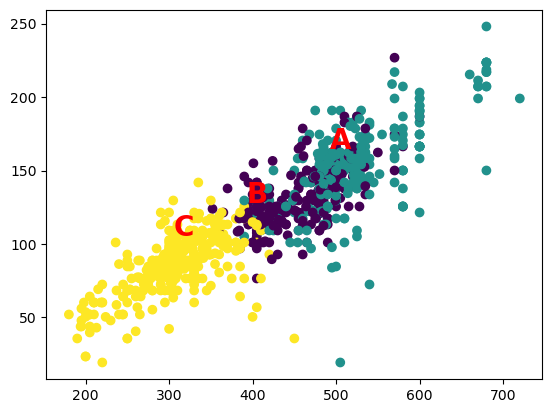

In [21]:
plt.scatter(x = poke_df['total'], y = poke_df['damage_output'], c = poke_df_copy['clusters_kmeans'], cmap = 'viridis')

plt.annotate("C", (poke_df['total'][0], poke_df['damage_output'][0]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=20, color='red', fontweight = 'bold')
plt.annotate("B", (poke_df['total'][1], poke_df['damage_output'][1]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=20, color='red', fontweight = 'bold')
plt.annotate("A", (poke_df['total'][33], poke_df['damage_output'][33]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=20, color='red', fontweight = 'bold')
plt.show()


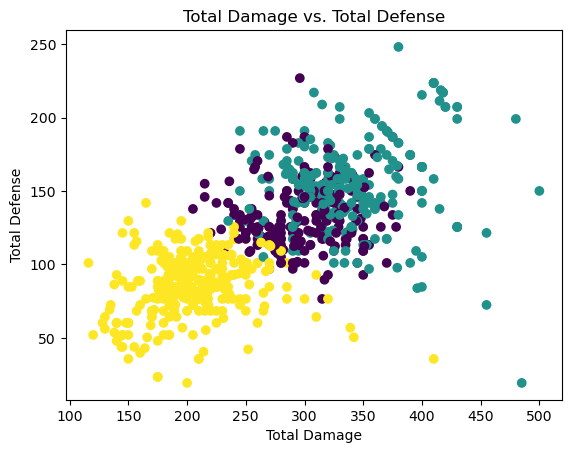

In [37]:
plt.scatter(x = poke_df['total_defense'], y = poke_df['damage_output'], c = poke_df_copy['clusters_kmeans'], cmap = 'viridis')
plt.title("Total Damage vs. Total Defense")
plt.xlabel("Total Damage")
plt.ylabel("Total Defense")
plt.show()


In [45]:
poke_df['defense_add_damage'] = poke_df['total_defense'] + poke_df['damage_output']

poke_df_sorted = poke_df.sort_values(by = 'defense_add_damage', ascending = False)

poke_sorted_subset = poke_df_sorted[['name', 'type1', 'total_defense', 'damage_output', 'defense_add_damage', 'weakness']]

display(poke_sorted_subset.head(20))

,name,type1,total_defense,damage_output,defense_add_damage,weakness
487,Arceus,normal,480,199.047188,679.047188,fighting
248,Lugia,psychic,500,150.035391,650.035391,bug
770,Lunala,psychic,430,207.215821,637.215821,bug
769,Solgaleo,psychic,430,207.215821,637.215821,bug
701,Yveltal,dark,418,217.018181,635.018181,fighting
700,Xerneas,fairy,418,217.018181,635.018181,steel
149,Mewtwo,psychic,416,218.651907,634.651907,bug
634,Reshiram,dragon,410,223.553087,633.553087,fairy
635,Zekrom,dragon,410,223.553087,633.553087,fairy
479,Dialga,steel,410,223.553087,633.553087,fire


In [23]:
print(poke_df_copy[poke_df_copy['name'] == 'Bulbasaur'])
print(poke_df_copy[poke_df_copy['name'] == 'Ivysaur'])
print(poke_df_copy[poke_df_copy['name'] == 'Venusaur'])

   number       name  type1   type2  total        hp    attack   defense  \
0       1  Bulbasaur  grass  poison    318 -0.893329 -0.904505 -0.753104   

   sp_attack  sp_defense  ...  psychic  electric  fighting bug ice      PCA1  \
0  -0.125093   -0.159897  ...        0         0         0   0   0 -1.532599   

       PCA2  color  clusters_kmeans gmm  
0 -0.046301  green                2   2  

[1 rows x 43 columns]
   number     name  type1   type2  total        hp    attack   defense  \
1       2  Ivysaur  grass  poison    405 -0.317083 -0.458607 -0.276716   

   sp_attack  sp_defense  ...  psychic  electric  fighting bug ice      PCA1  \
1   0.395756    0.396392  ...        0         0         0   0   0 -0.151511   

       PCA2  color  clusters_kmeans gmm  
1 -0.055104  green                0   2  

[1 rows x 43 columns]
   number      name  type1   type2  total        hp    attack  defense  \
2       3  Venusaur  grass  poison    525  0.451245  0.227391  0.40384   

   sp_attack 

In [24]:
#https://github.com/PokeAPI/pokeapi/blob/master/data/v2/csv/moves.csv
#https://github.com/christopher-cao/Pokemon-Simulator-in-Python/blob/master/Pokemon%20Moves.csv


For this we are going to use K-means to put the pokemon moves into clusters. First thing I am going to do here is actually remove all the moves that don't have attack power. There are moves in the game that upgrade defense, agility, attack power, or debuff the enemy. While these can be powerful, there is not a great way to model this since there technically is no power to it. So with that said, this analysis is only going to look at the moves that actually do damage. It should be noted, however, that the "utility moves" as I will call them can be very effective in the right team composition or Pokemon. So further analysis should be done in future research to determine how these might come into play.

In [25]:
filtered_poke_c0 = poke_df[poke_df_copy['clusters_kmeans'] == 0 ]
filtered_poke_c1 = poke_df[poke_df_copy['clusters_kmeans'] == 1 ]
filtered_poke_c2 = poke_df[poke_df_copy['clusters_kmeans'] == 2 ]

display(filtered_poke_c0.sort_values(by = 'damage_output', ascending = False))

filtered_poke_c0.describe()


,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,abilities,move_type1,move_type2,total_defense,STAB,damage_output,weakness
773,795,Pheromosa,bug,fighting,570,71,137,37,137,37,151,7,0,['Beast Boost'],bug,fighting,296,1.5,226.820540,fire
564,571,Zoroark,dark,NaN,510,60,105,60,120,60,105,5,0,['Illusion'],dark,NaN,285,1.5,186.794239,fighting
486,491,Darkrai,dark,NaN,600,70,90,90,135,90,125,4,1,['Bad Dreams'],dark,NaN,375,1.5,186.794239,fighting
444,448,Lucario,fighting,steel,525,70,110,70,115,70,90,4,0,"['Steadfast', 'Inner Focus', 'Justified']",fighting,steel,300,1.5,186.794239,flying
613,620,Mienshao,fighting,NaN,510,65,125,60,95,60,105,5,0,"['Inner Focus', 'Regenerator', 'Reckless']",fighting,NaN,290,1.5,182.709923,flying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,Poliwhirl,water,NaN,385,65,65,65,50,50,90,1,0,"['Water Absorb', 'Damp', 'Swift Swim']",water,NaN,270,1.5,96.939278,electric
206,207,Gligar,ground,flying,430,65,75,105,35,65,85,2,0,"['Hyper Cutter', 'Sand Veil', 'Immunity']",ground,flying,320,1.5,92.854961,water
188,189,Jumpluff,grass,flying,460,75,55,70,55,95,110,2,0,"['Chlorophyll', 'Leaf Guard', 'Infiltrator']",grass,flying,350,1.5,92.854961,fire
648,660,Diggersby,normal,ground,423,85,56,77,50,77,78,6,0,"['Pickup', 'Cheek Pouch', 'Huge Power']",normal,ground,317,1.5,89.587508,fighting


,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,total_defense,STAB,damage_output
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.0,215.000000
mean,358.390698,457.102326,69.534884,79.009302,66.097674,80.027907,73.009302,89.539535,3.372093,0.018605,298.181395,1.5,132.911657
std,224.208693,47.290895,14.163512,20.083934,15.093625,23.754570,18.304535,22.246644,1.864865,0.135439,36.399261,0.0,21.374523
min,2.000000,352.000000,35.000000,35.000000,30.000000,30.000000,35.000000,30.000000,1.000000,0.000000,205.000000,1.5,76.517696
25%,158.000000,413.500000,60.000000,64.500000,57.500000,63.500000,60.000000,72.000000,2.000000,0.000000,270.000000,1.5,117.360860
50%,336.000000,458.000000,68.000000,80.000000,65.000000,80.000000,70.000000,90.000000,3.000000,0.000000,299.000000,1.5,129.613809
75%,543.500000,490.000000,75.000000,92.500000,75.000000,95.000000,80.000000,105.000000,5.000000,0.000000,323.000000,1.5,145.951075
max,795.000000,600.000000,150.000000,137.000000,115.000000,145.000000,140.000000,160.000000,7.000000,1.000000,390.000000,1.5,226.820540


In [26]:
filtered_poke_c1.describe()



,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,total_defense,STAB,damage_output
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.00000,252.000000,252.000000,252.000000,252.0,252.000000
mean,448.035714,522.952381,88.404762,99.273810,97.079365,84.952381,89.309524,63.93254,3.972222,0.186508,338.726190,1.5,153.487611
std,226.862251,63.049321,25.618929,25.811461,28.605742,28.435671,26.700482,23.82187,1.944248,0.390291,47.150184,0.0,30.290589
min,3.000000,390.000000,20.000000,10.000000,10.000000,10.000000,31.000000,5.00000,1.000000,0.000000,235.000000,1.5,19.337266
25%,247.250000,485.000000,71.750000,80.000000,79.000000,60.000000,70.000000,45.00000,2.000000,0.000000,305.000000,1.5,135.127636
50%,466.500000,510.000000,85.000000,100.000000,91.000000,85.000000,89.000000,60.00000,4.000000,0.000000,333.000000,1.5,150.035391
75%,639.250000,558.000000,100.000000,120.000000,111.250000,101.250000,100.000000,80.00000,5.000000,0.000000,366.000000,1.5,170.456973
max,801.000000,720.000000,255.000000,181.000000,230.000000,173.000000,230.000000,130.00000,7.000000,1.000000,500.000000,1.5,248.058986


In [27]:
filtered_poke_c2.describe()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,total_defense,STAB,damage_output
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.0,313.000000
mean,377.674121,305.523962,51.150160,53.626198,53.699681,47.591054,50.670927,48.785942,3.575080,0.006390,204.306709,1.5,85.680657
std,230.888173,49.162345,20.144346,19.167553,21.872868,16.946338,18.257340,19.079679,1.921943,0.079808,38.294346,0.0,20.702682
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,116.000000,1.5,19.337266
25%,177.000000,280.000000,40.000000,40.000000,40.000000,35.000000,40.000000,35.000000,2.000000,0.000000,183.000000,1.5,73.250243
50%,360.000000,308.000000,50.000000,52.000000,50.000000,45.000000,49.000000,48.000000,3.000000,0.000000,200.000000,1.5,88.770645
75%,577.000000,335.000000,59.000000,65.000000,62.000000,60.000000,58.000000,64.000000,5.000000,0.000000,225.000000,1.5,101.023594
max,790.000000,450.000000,250.000000,125.000000,160.000000,105.000000,131.000000,100.000000,7.000000,1.000000,410.000000,1.5,141.866759


In [28]:
###number of legendaries and number of pokemon####

num_legendaries0 = poke_df_copy[(poke_df_copy['clusters_kmeans'] == 0) & (poke_df_copy['legendary'] == 1)]
num_legendaries1 = poke_df_copy[(poke_df_copy['clusters_kmeans'] == 1) & (poke_df_copy['legendary'] == 1)]
num_legendaries2 = poke_df_copy[(poke_df_copy['clusters_kmeans'] == 2) & (poke_df_copy['legendary'] == 1)]

display(num_legendaries0.shape)
display(num_legendaries1.shape)
display(num_legendaries2.shape)

print(filtered_poke_c0.shape)
print(filtered_poke_c1.shape)
print(filtered_poke_c2.shape)

(4, 43)

(47, 43)

(2, 43)

(215, 20)
(252, 20)
(313, 20)


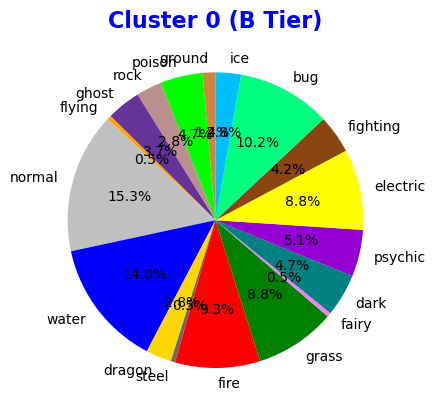

In [29]:
####number of pokemon by type####

cluster = 0

cluster_dict = {0 : {} , 1 : {}, 2 : {}}

subdict_type = {}

total = 0

for a_type in set_types:

    subdict_type[a_type] = 0


while cluster < 3:

    for a_key in subdict_type.keys():

        count_0 = len(poke_df_copy[(poke_df_copy['type1'] == a_key) & (poke_df_copy['clusters_kmeans'] == cluster)])
        
        cluster_dict[cluster][a_key] = int(count_0)

        total += count_0

    cluster_dict[cluster]['total'] = int(total)
    cluster += 1   

    total = 0



cluster0_total = cluster_dict[0]['total']
cluster1_total = cluster_dict[1]['total']
cluster2_total = cluster_dict[2]['total']




keys0 = list(cluster_dict[0].keys())
values0 = list(cluster_dict[0].values())

keys1 = list(cluster_dict[1].keys())
values1 = list(cluster_dict[1].values())

keys2 = list(cluster_dict[2].keys())
values2 = list(cluster_dict[2].values())



keys0.pop()
values0.pop()

keys1.pop()
values1.pop()

keys2.pop()
values2.pop()

colors = [type_dict[a_type] for a_type in set_types]


plt.pie(values0, labels = keys0, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title("Cluster 0 (B Tier)", fontsize=16, color='blue', fontweight='bold')
plt.show()





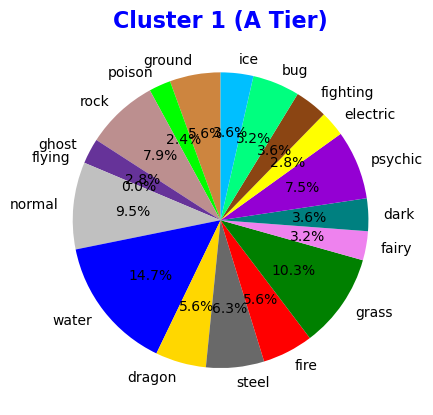

In [30]:
plt.pie(values1, labels = keys1, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title("Cluster 1 (A Tier)", fontsize=16, color='blue', fontweight='bold')

plt.show()

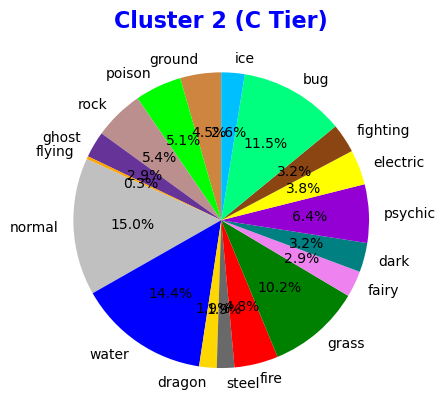

In [31]:
plt.pie(values2, labels = keys2, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title("Cluster 2 (C Tier)", fontsize=16, color='blue', fontweight='bold')

plt.show()

['grass', 'grass', 'grass', 'fire', 'fire', 'fire', 'water', 'water', 'water', 'bug', 'bug', 'bug', 'bug', 'bug', 'bug', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'poison', 'poison', 'electric', 'electric', 'ground', 'ground', 'poison', 'poison', 'poison', 'poison', 'poison', 'poison', 'fairy', 'fairy', 'fire', 'fire', 'normal', 'normal', 'poison', 'poison', 'grass', 'grass', 'grass', 'bug', 'bug', 'bug', 'bug', 'ground', 'ground', 'normal', 'normal', 'water', 'water', 'fighting', 'fighting', 'fire', 'fire', 'water', 'water', 'water', 'psychic', 'psychic', 'psychic', 'fighting', 'fighting', 'fighting', 'grass', 'grass', 'grass', 'water', 'water', 'rock', 'rock', 'rock', 'fire', 'fire', 'water', 'water', 'electric', 'electric', 'normal', 'normal', 'normal', 'water', 'water', 'poison', 'poison', 'water', 'water', 'ghost', 'ghost', 'ghost', 'rock', 'psychic', 'psychic', 'water', 'water', 'electric', 'electric', 'grass', 'grass', 'ground', 'ground', 'fighting', 

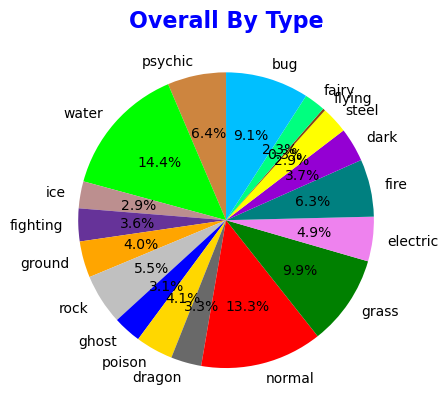

In [32]:
poke_type_total_list = list(poke_df_copy['type1'])

print(poke_type_total_list)

total_types_poke = len(poke_type_total_list)

total_type_dict = {}
total_type_dict['psychic'] = 0
total_type_dict['water'] = 0
total_type_dict['ice'] = 0
total_type_dict['fighting'] = 0
total_type_dict['ground'] = 0
total_type_dict['rock'] = 0
total_type_dict['ghost'] = 0
total_type_dict['poison'] = 0
total_type_dict['dragon'] = 0
total_type_dict['normal'] = 0
total_type_dict['grass'] = 0
total_type_dict['electric'] = 0
total_type_dict['fire'] = 0
total_type_dict['dark'] = 0
total_type_dict['steel'] = 0
total_type_dict['flying'] = 0
total_type_dict['fairy'] = 0
total_type_dict['bug'] = 0
counter = 0

for a_type in poke_type_total_list:

    total_type_dict[a_type] += 1
    counter += 1

for a_key in total_type_dict:

    total_type_dict[a_key] = total_type_dict[a_key] / counter * 100
    

plt.pie(total_type_dict.values(), labels = total_type_dict.keys(), colors = colors, autopct='%1.1f%%', startangle=90)
plt.title("Overall By Type", fontsize=16, color='blue', fontweight='bold')    

print(total_type_dict)
print(counter)


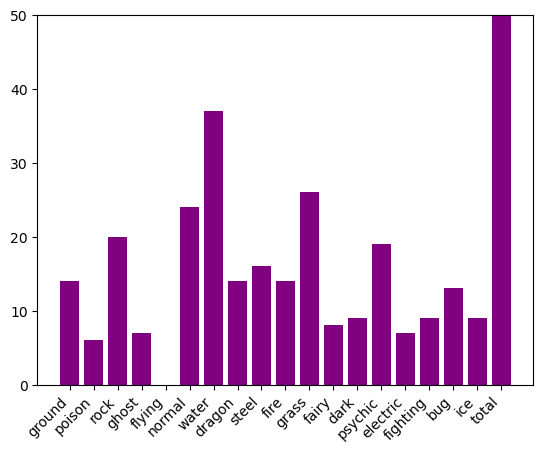

In [33]:
keys1 = list(cluster_dict[1].keys())
values1 = list(cluster_dict[1].values())

plt.bar(keys1, values1, color = 'purple')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 50)
plt.show()

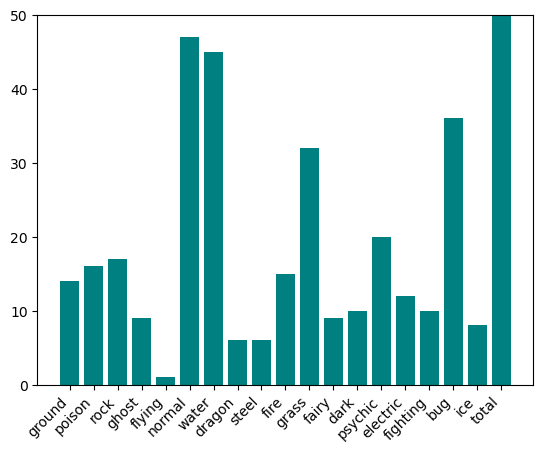

In [34]:
keys2 = list(cluster_dict[2].keys())
values2 = list(cluster_dict[2].values())

plt.bar(keys2, values2, color = 'teal')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 50)
plt.show()

#### seeing lots of fighting / steel / and dark in tier 2 compared to the rest ####

In [35]:
centers = kmeans.cluster_centers_
print(centers)
print(centers.shape)


[[ 4.92128551e-02  1.24810022e-01 -1.71308647e-01  3.96725070e-01
   1.37135059e-01  9.07842822e-01  3.20668294e-01  1.86046512e-02
   1.39534884e-02  5.11627907e-02  4.65116279e-03  4.65116279e-03
   8.83720930e-02  4.65116279e-02  1.53488372e-01  4.65116279e-02
   4.18604651e-02  1.39534884e-01  4.65116279e-03  8.83720930e-02
   3.72093023e-02  2.79069767e-02  2.79069767e-02  2.79069767e-02
   1.02325581e-01  9.30232558e-02]
 [ 7.74125695e-01  8.19880071e-01  8.82929374e-01  5.67718825e-01
   7.41644139e-01 -3.61372168e-02  8.56862972e-01  1.86507937e-01
   5.55555556e-02  7.53968254e-02  6.34920635e-02  3.17460317e-02
   1.03174603e-01  3.57142857e-02  9.52380952e-02  2.38095238e-02
   3.57142857e-02  1.46825397e-01  2.60208521e-18  2.77777778e-02
   2.77777778e-02  7.93650794e-02  3.57142857e-02  5.55555556e-02
   5.15873016e-02  5.55555556e-02]
 [-6.57062105e-01 -7.45827261e-01 -5.93184803e-01 -7.29587967e-01
  -6.91304667e-01 -5.94503604e-01 -9.10137867e-01  6.38977636e-03
   4.4

In [36]:
### SVM to determine major coefficients ####

display(poke_df_copy[feature_vars])
display(poke_df_copy['clusters_kmeans'])
print(poke_df_copy[feature_vars].columns)
#display(poke_df_copy)

poke_train, poke_test, cluster_train, cluster_test = train_test_split(poke_df_copy[feature_vars], poke_df_copy['clusters_kmeans'], test_size= 0.2, random_state= 69)

model = SVC(kernel = 'linear')

model.fit(poke_train, cluster_train)

prediction = model.predict(poke_test)

print(prediction)

print(cluster_test)

accuracy = accuracy_score(cluster_test, prediction)

print(accuracy)
coefficients = model.coef_

print(coefficients.shape)

,hp,attack,defense,sp_attack,sp_defense,speed,damage_output,legendary,ground,psychic,...,fighting,water,flying,electric,ghost,rock,ice,dragon,bug,fire
0,-0.893329,-0.904505,-0.753104,-0.125093,-0.159897,-0.734069,-0.638033,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.317083,-0.458607,-0.276716,0.395756,0.396392,-0.181107,-0.042001,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.451245,0.227391,0.403840,1.090221,1.138111,0.556176,0.809474,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.123828,-0.801606,-0.957271,-0.298709,-0.716187,0.003214,-0.680607,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.393916,-0.390007,-0.446854,0.395756,-0.159897,0.556176,0.000573,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.104324,0.879088,1.084395,1.333284,1.175196,-0.144243,1.362933,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,-0.355499,3.623078,2.037173,-0.333432,-1.420820,1.625236,2.044113,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,5.944791,0.879088,-0.616993,0.986051,-0.604929,-0.807797,1.150064,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,1.104324,1.084887,1.016340,2.027749,0.730165,0.519312,1.916392,1,0,1,...,0,0,0,0,0,0,0,0,0,0


0      2
1      0
2      1
3      2
4      0
      ..
775    1
776    1
777    1
778    1
779    1
Name: clusters_kmeans, Length: 780, dtype: int32

Index(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed',
       'damage_output', 'legendary', 'ground', 'psychic', 'steel', 'fairy',
       'grass', 'dark', 'normal', 'poison', 'fighting', 'water', 'flying',
       'electric', 'ghost', 'rock', 'ice', 'dragon', 'bug', 'fire'],
      dtype='object')
[1 0 0 1 1 1 2 0 2 1 1 2 0 2 1 1 1 0 2 2 2 2 2 1 2 0 2 2 2 0 1 2 1 1 0 1 1
 2 2 1 1 1 1 0 1 1 2 2 2 1 2 1 1 2 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 1 0 0 1 2
 0 1 0 2 2 1 0 1 1 0 2 2 2 1 1 1 1 0 1 2 1 1 1 1 1 1 0 2 2 2 1 2 1 0 2 2 2
 0 1 1 1 1 2 0 2 1 2 1 2 0 1 2 0 0 0 2 0 1 2 0 1 0 2 1 0 0 1 1 0 0 0 2 0 0
 0 1 1 1 0 1 2 2]
772    1
206    0
262    0
582    1
758    1
      ..
779    1
357    0
584    1
266    2
314    2
Name: clusters_kmeans, Length: 156, dtype: int32
0.9743589743589743
(3, 26)
